## Telco Churn Classification Project

## Reduce Customer Churn
<hr style="border-top: 50px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

### Project Goals
- The main goal of this project is identify drivers of customer churn.
- Build machine learning model that can predict and identify customers that are like to churn.
- Deliver a report on recommendations for reducing customer churn.

#### Project Description
- Telco is a leading communications company offering great services to its customers.
- Customers are churning at a high rate affecting the company's performance.
- We will therefore identify drivers of customer churn and look at features with highest and low churn rate.
- We will use machine learning prediction models and demographics and offer recommendations for customer retention.

#### Initial Questions
- What is the churn rate for Telco?
- What demographic has the highest churn rate?
- What are the features with the highest churn rate?
- What are the features with the lowest churn rate?



## Standard imports

In [92]:
import numpy as np
import pandas as pd
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,ConfusionMatrixDisplay

# scipy stats for our subversions
from scipy import stats

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(8, 6))
plt.rc('font', size=13)


## I. Data Acquisition
<hr style="border-top: 50px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>
- I acquired my telco data using df acquire.get_telco_data

In [20]:

df = acquire.get_telco_data()


## II. Data Cleaning & Preparation

- I cleaned my data by getting rid of spaces, null values and special characters.

In [21]:
df = prepare.prep_telco(df)

- After cleaning my dataframe I encoded features of interest and dropped redudant collumns with missing and unusual values to get my train, test, validate numbers.
- At this point, I split data into train, validate and test datasets.
- The data is now ready for exploration and modeling.

In [24]:
telco_train, telco_validate, telco_test = prepare.my_train_test_split(df,"churn_encoded")
print(telco_train.shape, telco_validate.shape, telco_test.shape)
print(telco_train.describe().T)

(4225, 34) (1409, 34) (1409, 34)
                                        count         mean          std  \
payment_type_id                        4225.0     2.319053     1.151612   
internet_service_type_id               4225.0     1.875976     0.738711   
contract_type_id                       4225.0     1.687101     0.828349   
senior_citizen                         4225.0     0.161893     0.368397   
tenure                                 4225.0    32.500828    24.532563   
monthly_charges                        4225.0    65.056142    30.268493   
total_charges                          4225.0  2298.513598  2271.603284   
gender_encoded                         4225.0     0.508639     0.499985   
partner_encoded                        4225.0     0.488521     0.499927   
dependents_encoded                     4225.0     0.306272     0.460999   
phone_service_encoded                  4225.0     0.906982     0.290492   
paperless_billing_encoded              4225.0     0.593846     0.49

## III. Data Exploration
<hr style="border-top: 50px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>


### After preparing the data, we now explore the data in order to identify the drivers of churn by using train dataset.
### 1. From the chart below:
- We will first of all visualize the overal churn distribution on a pie chart
- In this chart, we see that a bigger percentage of customers have not churned while only small percentage have charned.

In [26]:
print(f'Churn percentage {round(telco_train.churn_encoded.mean(),4)*100}%')

Churn percentage 26.529999999999998%


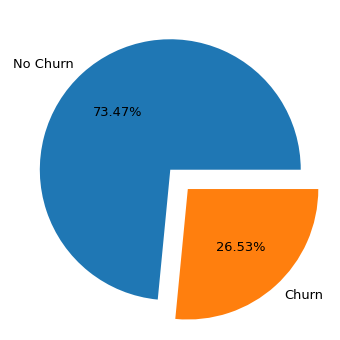

In [27]:
y = telco_train.churn_encoded.value_counts()
plt.pie(y,labels=['No Churn','Churn'] ,explode= [0,0.2], autopct='%.2f%%')
plt.show()

### 2. From the distribution below:
- We can see here that a large number of customers that churn have a month to month contract.
- We can also see that the longer the contract the lesser the customers churn.

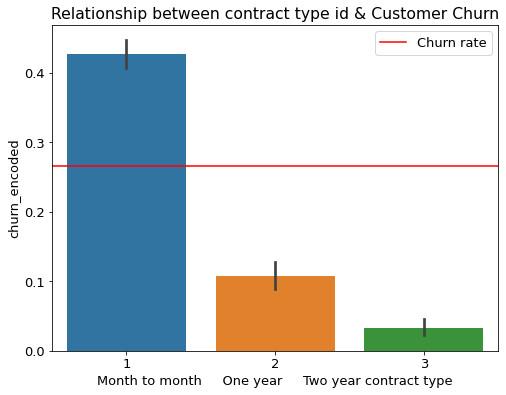

In [61]:
plt.title("Relationship between contract type id & Customer Churn")
sns.barplot(x="contract_type_id", y="churn_encoded", data=telco_train)
churn_encoded_rate = telco_train.churn_encoded.mean()
plt.axhline(churn_encoded_rate, color="r", label = "Churn rate")
plt.xlabel('Month to month     One year     Two year contract type')
plt.legend()
plt.show()

### 3. From the distribution below:
- We can see here that not senior citizen have the highest churn rate.
- The higher the tenure the hire the churn among not senior_citizen, they are dependent.

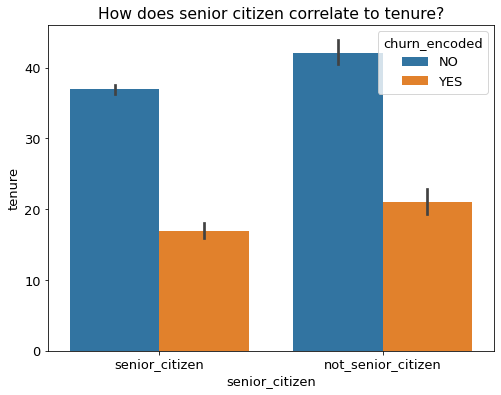

In [70]:
df["senior_citizen"].replace({0:"senior_citizen",1:"not_senior_citizen"},inplace=True)
df["churn_encoded"].replace({0:"NO", 1:"YES"}, inplace=True)
sns.barplot(data=df, x=df.senior_citizen,y=df.tenure,hue=df.churn_encoded)
plt.title('How does senior citizen correlate to tenure?')
plt.show()

### Statistical test senior citizen vs tenure

In [106]:
alpha = 0.05
null_hyp = 'senior citizen and tenure are independent'
alt_hyp = 'senior citizen and tenure rate are dependent'
observed = pd.crosstab(telco_train.tenure, telco_train.senior_citizen)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('reject the null hypothesis that and posit', alt_hyp)
else:
    print('fail to reject the null hypothesis and posit', null_hyp)


fail to reject the null hypothesis and posit senior citizen and tenure are independent


<hr style="border-bottom: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>


### I did not use all the features because in order to get a better analysis I needed to test features that had strong positive and negative correlation on customers' churn and retention.
### We now identify features with the highest churn
 - Positive Correlation

### Hypothesis

### alpha = 0.05
        
### HO: There is no relation between column features and churn rate
    (column features and churn rate are independent)
    (We fail to reject the H0 (that column feature and churn rate are independent))
     
### H⍺: There is a relation between column features and churn rate 
    (collumn features and churn are dependent)
    (We reject the H0 (that column feature and churn rate are independent))

### 1. Is there a relation between internet_service_type_id and customers churn?

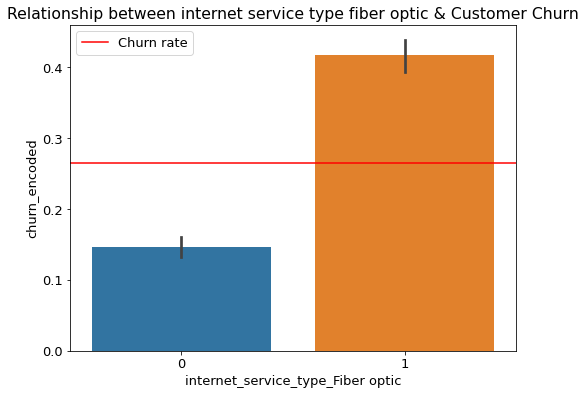

In [62]:
plt.title("Relationship between internet service type fiber optic & Customer Churn")
sns.barplot(x="internet_service_type_Fiber optic", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r",label="Churn rate")
plt.legend()
plt.show()

 - There is a relationship between internet_type_fiber_optic and churn rate
 - Reject H0 that internet_type_fiber_optic and churn rate are independent


### 2. Is there a relation between gender and customers churn?

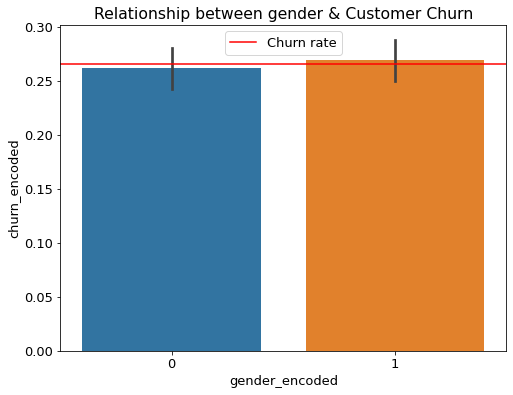

In [66]:
plt.title("Relationship between gender & Customer Churn")
sns.barplot(x="gender_encoded", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

### Statistical test gender vs churn

In [88]:
alpha = 0.05
null_hyp = 'gender_encoded and churn rate are independent'
alt_hyp = 'gender_encoded and churn rate are dependent'
observed = pd.crosstab(telco_train.churn_encoded, telco_train.gender_encoded)
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('reject the null hypothesis that and posit', alt_hyp)
else:
    print('fail to reject the null hypothesis and posit', null_hyp)


fail to reject the null hypothesis and posit gender_encoded and churn rate are independent


 - There is no relationship between gender and churn rate
 - We fail to reject the null hypothesis that gender and churn rate are independent


### 3. Is there a relation between streaming tv and churn?

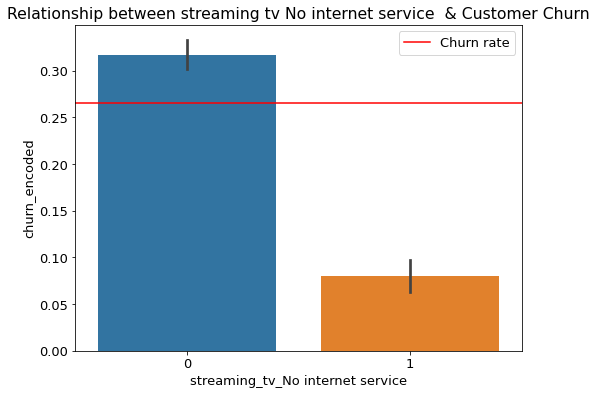

In [64]:
plt.title("Relationship between streaming tv No internet service  & Customer Churn")
sns.barplot(x="streaming_tv_No internet service", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

 - There is a relationship between streaming_tv_no and churn rate
 - Reject the null hypothesis that streaming_tv_no and churn rate are independent


### We now identify features with the lowest churn
- Negative Correlation
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

### 1. Is there a relation between online security No internet service and churn?

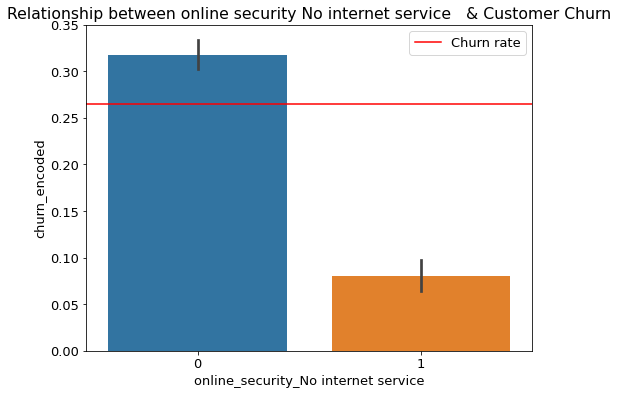

In [67]:
plt.title("Relationship between online security No internet service   & Customer Churn")
sns.barplot(x="online_security_No internet service", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

 - There is a relationship between online_security No internet service & churn rate
 - Reject the null hypothesis that online_security_No internet service and churn rate are independent


### 2.  Is there a relation between contract type One year and customers churning?

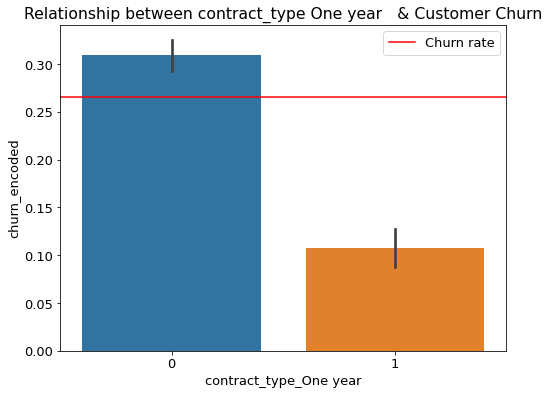

In [68]:
plt.title("Relationship between contract_type One year   & Customer Churn")
sns.barplot(x="contract_type_One year", y="churn_encoded", data=telco_train)
population_churn_rate = telco_train.churn_encoded.mean()
plt.axhline(population_churn_rate, color="r", label="Churn rate")
plt.legend()
plt.show()

 - There is a relationship between contract_type_one_year churn rate
 - Reject the null hypothesis that contract_type_one_year and churn rate are independent


## IV. Model Data & Evaluation
<hr style="border-top: 50px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>


### After we have identified the drivers of churn, we will now create machine learning models that will help us identify and prevent customers that are likely to churn.

### I used three different models:
### 1. Decision tree model
### 2. Random Forest
### 3. K nearest neighbors model

### We will  established a baseline model which predicts that customers with a percentage rate of 73 do not churn.
### We use this model as a simple means of establishing whether other models can provide better results than the baseline.

### Establish a Baseline
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [71]:
telco_baseline = (y_telco_train == 0).mean()
print('The churn baseline is:', telco_baseline)

The churn baseline is: 0.7346745562130178


- The baseline model is the mode of target varible that did not churn.
- Our baseline model will always be predicting that a customer does not churn at an accuracy level of 73%.

### Build a Model to Test Multiple Types of Models as MVPs
- Create a model.
- Fit to train.
- Score model.

In [72]:
def score_models(X_telco_train, y_telco_train, X_telco_validate, y_telco_validate):
    '''
    Score multiple models on train and validate datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = dt_model1, rf_model, knn1_model.
    '''
    dt_model1 = DecisionTreeClassifier(max_depth = 1, random_state = 123)
    rf_model = RandomForestClassifier(min_samples_leaf = 1, max_depth = 10)
    knn1_model = KNeighborsClassifier()
    models = [dt_model1, rf_model, knn1_model]
    for model in models:
        model.fit(X_telco_train, y_telco_train)
        actual_train = y_telco_train
        predicted_train = model.predict(X_telco_train)
        actual_validate = y_telco_validate
        predicted_validate = model.predict(X_telco_validate)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('validate score: ')
        print(classification_report(actual_validate, predicted_validate))
        print('________________________')
        print('')
    return dt_model1, rf_model, knn1_model


In [73]:
dt_model1, rf_model, knn1_model = score_models(X_telco_train, y_telco_train, X_telco_validate, y_telco_validate)

DecisionTreeClassifier(max_depth=1, random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225

validate score: 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409

________________________

RandomForestClassifier(max_depth=10)

train score: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3104
           1       0.83      0.71      0.77      1121

    accuracy      

## Test
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [77]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_telco_test, y_telco_test)))

Accuracy of Decision Tree classifier on test set: 0.73


In [82]:
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rf.score(X_telco_test, y_telco_test)))

Accuracy of Random Forest Classifier on test set: 0.80


In [86]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn1.score(X_telco_test, y_telco_test)))

Accuracy of KNN classifier on test set: 0.77


- When we run the test data, the accuracy for the Decision tree model1 train is maintained at 73%. Therefore, the model has no data overfit.

- When we run the test data, the accuracy for the Randon Forest dropped from 89% to 80%. Therefore, the model overfit the data.

- When we run the test data, the accuracy for the KNN model train dropped from 78% to 77%. Therefore, the model overfit the data.

- The decision tree is now selected as the final model, as it does not appear to overfit the data.

### Best Model
#### As per above scores multiple models, decision tree model1 at an accuracy level of 73% performs better on my in-sample data with a baseline percentage of 73.

## V. Conclusions & Next Steps
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>



### Executive Summary 

- With Telco churn rate being at 27%. We identified the main drivers of churn. As per our analysis the main issues were customers with short term contracts, device protection with no internet service, customers with payment type electronic checks. 
- We also identified Decision tree as our best machine learning model to help us obtain better accuracy to identify and prevent customer churn.

### Recommendations

- Come up with incentives and promotions to have customers sign up for long term contracts.
- Provide customers with technical support.
- Set customer accounts to automatic payments to prevent missed payments.

### Next Steps

- Investigate why customers with Fibre optic churn.